In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
# Initialize CNN
model = Sequential()

In [3]:
# building model
model.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# pooling
model.add(MaxPooling2D(pool_size = (2,2)))

# adding a second convol layer
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units=128, activation='relu'))
# output layer
model.add(Dense(units=9, activation='softmax'))

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [4]:
# compile
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Fitting the CNN to the images(Image Augmentation, Image Preprocessing)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(  
        rescale=1./255,
        shear_range=0.2,             
        zoom_range=0.2,              
        horizontal_flip=True)

In [6]:
# normalizing
test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
# path to your experimental data
os.chdir('/home/sachin_sharma/Desktop/jpg_data')

In [8]:
# This section will create Training set( Training_Set:TestSet ratio 80:20)
training_set = train_datagen.flow_from_directory(
        'TrainingSet', 
        target_size=(64, 64),   
        batch_size=32,          
        class_mode='categorical') 

Found 20140 images belonging to 9 classes.


In [9]:
# This section will create the Test set
test_set = test_datagen.flow_from_directory( 
        'TestSet',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical', 
        shuffle=False)

Found 5660 images belonging to 9 classes.


In [10]:
history = model.fit_generator(training_set, 
                        steps_per_epoch=(training_set.samples/32),
                        epochs=25,
                        validation_data=test_set, 
                        validation_steps=(test_set.samples/32)) 

Epoch 1/25
630/629 [==============================] - 18s 29ms/step - loss: 1.2368 - acc: 0.5229 - val_loss: 0.9386 - val_acc: 0.6633
Epoch 2/25
630/629 [==============================] - 17s 28ms/step - loss: 0.8319 - acc: 0.6907 - val_loss: 0.6876 - val_acc: 0.7521
Epoch 3/25
630/629 [==============================] - 17s 28ms/step - loss: 0.7053 - acc: 0.7398 - val_loss: 0.7396 - val_acc: 0.7205
Epoch 4/25
630/629 [==============================] - 17s 27ms/step - loss: 0.6591 - acc: 0.7566 - val_loss: 0.6283 - val_acc: 0.7678
Epoch 5/25
630/629 [==============================] - 17s 28ms/step - loss: 0.6093 - acc: 0.7733 - val_loss: 0.6198 - val_acc: 0.7687
Epoch 6/25
630/629 [==============================] - 17s 27ms/step - loss: 0.5880 - acc: 0.7809 - val_loss: 0.7611 - val_acc: 0.7193
Epoch 7/25
630/629 [==============================] - 17s 27ms/step - loss: 0.5406 - acc: 0.8015 - val_loss: 0.6026 - val_acc: 0.7836
Epoch 8/25
630/629 [==============================] - 17s 27ms

In [11]:
# saving the model
model.save('exp1_b_1.h5')

In [12]:
# Visualizing the mapping between labels
training_set.class_indices

{'AnnualCrop': 0,
 'Buildup': 1,
 'Forest': 2,
 'HerbaceousVegetation': 3,
 'Highway': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'River': 7,
 'SeaLake': 8}

In [14]:
# Confusion Matrix
Y_pred = model.predict_generator(test_set, test_set.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
#cm = confusion_matrix(test_set.classes, y_pred)
#visulaizing
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

#calling
df = cm2df(cm, ["AnnualCrop", "Buildup", "Forest", "HerbaceousVegetation", "Highway", "Pasture", "PermanentCrop", "River", "SeaLake"])
print(df)

Confusion Matrix
                      AnnualCrop  Buildup  Forest  HerbaceousVegetation  \
AnnualCrop                   497        0       3                    23   
Buildup                        0      857       0                     0   
Forest                         0        0     564                     1   
HerbaceousVegetation           0       17       4                   531   
Highway                        9       52       0                    27   
Pasture                       11        0       5                    15   
PermanentCrop                 16        8       0                    89   
River                         16       16       1                     4   
SeaLake                        4        0       7                     1   

                      Highway  Pasture  PermanentCrop  River  SeaLake  
AnnualCrop                 11       12             26     23        5  
Buildup                     1        0              2      0        0  
Forest          

In [16]:
# Classification report
print('Classification Report')
target_names = ['AnnualCrop','Buildup','Forest', 'HerbaceousVegetation', 'Highway', 'Pasture', 'PermanentCrop', 'River', 'SeaLake']
classificn_report = classification_report(test_set.classes, y_pred, target_names=target_names)
print(classificn_report)


Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.90      0.83      0.86       600
             Buildup       0.90      1.00      0.95       860
              Forest       0.97      0.94      0.95       600
HerbaceousVegetation       0.77      0.89      0.82       600
             Highway       0.80      0.71      0.75       600
             Pasture       0.86      0.81      0.83       600
       PermanentCrop       0.76      0.76      0.76       600
               River       0.82      0.81      0.81       600
             SeaLake       0.98      0.97      0.97       600

           micro avg       0.86      0.86      0.86      5660
           macro avg       0.86      0.86      0.86      5660
        weighted avg       0.86      0.86      0.86      5660



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


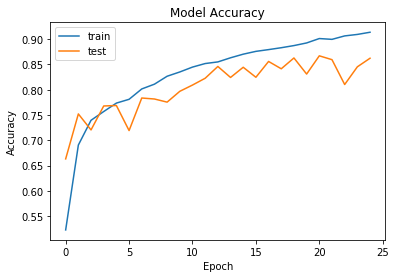

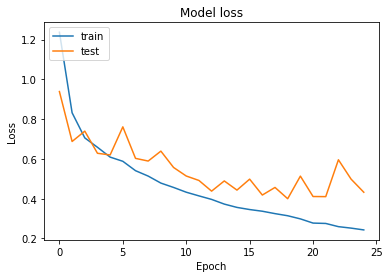

In [17]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()